In [72]:
import pandas as pd

In [73]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [74]:
dataFrame.head()#ilk birkaç satır

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [75]:
import seaborn as sbn
import matplotlib.pyplot as plt

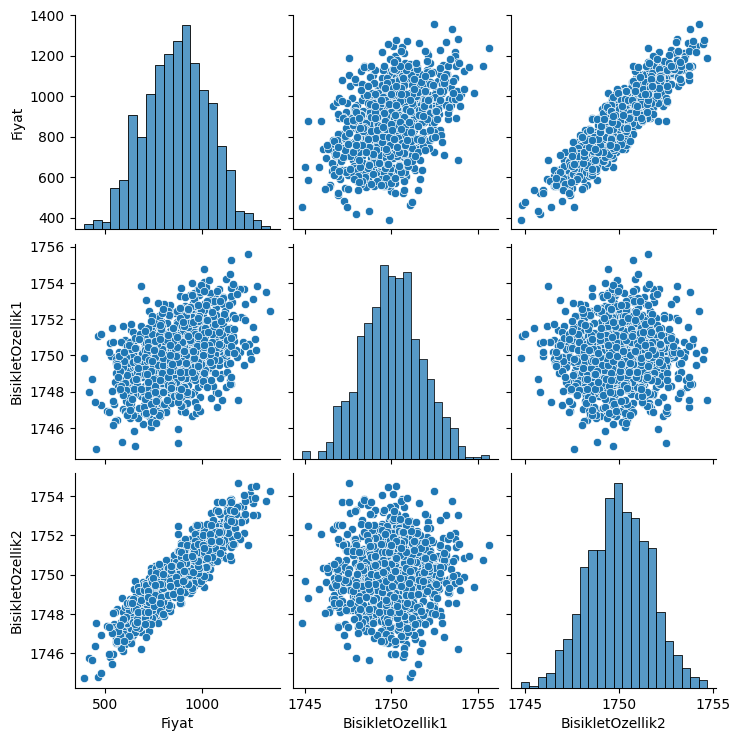

In [76]:
sbn.pairplot(dataFrame)#seaborn da bir görselleştirme aracıdır.

## veriyi test/train olarak ikiye ayırmak

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
y = dataFrame["Fiyat"].values

x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [79]:
x_train.shape#x_train boyutu

(670, 2)

In [80]:
x_test.shape#x_test boyutu

(330, 2)

In [81]:
y_train.shape

(670,)

In [82]:
y_test.shape

(330,)

In [83]:
#scaling

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler = MinMaxScaler()#X_scaled = (X - X_min) / (X_max - X_min)

In [86]:
scaler.fit(x_train)#öğrendi

MinMaxScaler()

In [87]:
x_train = scaler.transform(x_train)#uyguladı
x_test = scaler.transform(x_test)

In [88]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [89]:
import tensorflow as tf

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [91]:
model = Sequential()

model.add(Dense(4,activation="relu"))#4 nöronlu 3 katmanlı bir ağ oluşturduk
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))#tek bir çıkışa bağladık

model.compile(optimizer = "rmsprop",loss = "mse")#modeli derledik

In [92]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 [==============================] - 1s 2ms/step - loss: 795898.7500
Epoch 2/250
21/21 [==============================] - 0s 2ms/step - loss: 795846.5625
Epoch 3/250
21/21 [==============================] - 0s 2ms/step - loss: 795790.4375
Epoch 4/250
21/21 [==============================] - 0s 2ms/step - loss: 795725.3125
Epoch 5/250
21/21 [==============================] - 0s 2ms/step - loss: 795649.1250
Epoch 6/250
21/21 [==============================] - 0s 2ms/step - loss: 795561.0625
Epoch 7/250
21/21 [==============================] - 0s 2ms/step - loss: 795458.5000
Epoch 8/250
21/21 [==============================] - 0s 2ms/step - loss: 795339.8750
Epoch 9/250
21/21 [==============================] - 0s 2ms/step - loss: 795204.0000
Epoch 10/250
21/21 [==============================] - 0s 2ms/step - loss: 795047.3125
Epoch 11/250
21/21 [==============================] - 0s 2ms/step - loss: 794869.5625
Epoch 12/250
21/21 [==============================] - 0s 2ms/st

21/21 [==============================] - 0s 2ms/step - loss: 336261.2812
Epoch 97/250
21/21 [==============================] - 0s 2ms/step - loss: 322764.7188
Epoch 98/250
21/21 [==============================] - 0s 2ms/step - loss: 309237.5312
Epoch 99/250
21/21 [==============================] - 0s 2ms/step - loss: 295662.5625
Epoch 100/250
21/21 [==============================] - 0s 2ms/step - loss: 282011.5938
Epoch 101/250
21/21 [==============================] - 0s 3ms/step - loss: 268332.1875
Epoch 102/250
21/21 [==============================] - 0s 3ms/step - loss: 254680.7344
Epoch 103/250
21/21 [==============================] - 0s 2ms/step - loss: 241042.5312
Epoch 104/250
21/21 [==============================] - 0s 3ms/step - loss: 227488.8906
Epoch 105/250
21/21 [==============================] - 0s 2ms/step - loss: 213939.4844
Epoch 106/250
21/21 [==============================] - 0s 2ms/step - loss: 200571.7031
Epoch 107/250
21/21 [==============================] - 0s 2m

21/21 [==============================] - 0s 2ms/step - loss: 1466.1462
Epoch 193/250
21/21 [==============================] - 0s 2ms/step - loss: 1435.1207
Epoch 194/250
21/21 [==============================] - 0s 2ms/step - loss: 1399.8215
Epoch 195/250
21/21 [==============================] - 0s 2ms/step - loss: 1363.6163
Epoch 196/250
21/21 [==============================] - 0s 2ms/step - loss: 1325.9525
Epoch 197/250
21/21 [==============================] - 0s 3ms/step - loss: 1293.4683
Epoch 198/250
21/21 [==============================] - 0s 2ms/step - loss: 1254.0764
Epoch 199/250
21/21 [==============================] - 0s 2ms/step - loss: 1216.0200
Epoch 200/250
21/21 [==============================] - 0s 2ms/step - loss: 1183.0568
Epoch 201/250
21/21 [==============================] - 0s 2ms/step - loss: 1153.0217
Epoch 202/250
21/21 [==============================] - 0s 2ms/step - loss: 1114.9573
Epoch 203/250
21/21 [==============================] - 0s 2ms/step - loss: 1090

In [93]:
loss = model.history.history["loss"]

<Axes: >

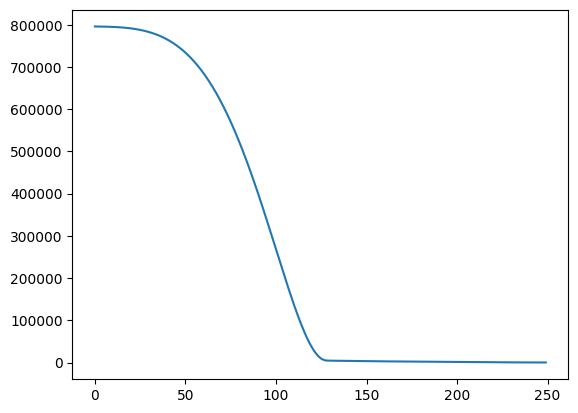

In [94]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [95]:
trainLoss = model.evaluate(x_train,y_train, verbose=0)

In [96]:
testLoss = model.evaluate(x_test,y_test,verbose=0)

In [97]:
trainLoss

155.89501953125

In [98]:
testLoss

148.1861572265625

In [99]:
testTahminleri = model.predict(x_test)

11/11 [==============================] - 0s 2ms/step


In [100]:
testTahminleri

array([[1069.1346 ],
       [ 637.4708 ],
       [ 876.86694],
       [ 898.10187],
       [ 903.7641 ],
       [ 480.2613 ],
       [ 930.5952 ],
       [ 988.54474],
       [ 936.4911 ],
       [1011.5596 ],
       [ 757.90155],
       [ 914.70264],
       [ 948.1233 ],
       [1046.6031 ],
       [1107.617  ],
       [ 694.0298 ],
       [1118.9066 ],
       [ 667.96246],
       [1145.6714 ],
       [ 886.95404],
       [ 893.7367 ],
       [ 723.76276],
       [ 476.3543 ],
       [ 630.7874 ],
       [ 837.05585],
       [1080.4336 ],
       [ 724.64185],
       [ 765.7415 ],
       [ 877.26306],
       [ 778.55914],
       [ 476.24722],
       [ 787.8137 ],
       [ 737.8836 ],
       [ 661.84985],
       [ 888.69257],
       [ 847.6943 ],
       [1028.5885 ],
       [1019.4876 ],
       [ 847.14935],
       [ 865.84033],
       [ 764.36346],
       [1163.1328 ],
       [1088.0431 ],
       [1078.2097 ],
       [ 871.4811 ],
       [ 612.19855],
       [1137.7887 ],
       [ 972.

In [101]:
tahminDf = pd.DataFrame(y_test,columns=["Gerçek Y"])

In [102]:
tahminDf

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [103]:
testTahminleri = pd.Series(testTahminleri.reshape(330,))

In [104]:
testTahminleri

0      1069.134644
1       637.470825
2       876.866943
3       898.101868
4       903.764099
          ...     
325    1007.379150
326     799.053406
327     771.778198
328    1153.342529
329     811.626404
Length: 330, dtype: float32

In [105]:
tahminDf = pd.concat([tahminDf,testTahminleri],axis=1)

In [106]:
tahminDf

,Gerçek Y,0
0,1081.652164,1069.134644
1,622.675990,637.470825
2,889.356810,876.866943
3,902.826733,898.101868
4,897.662404,903.764099
...,...,...
325,1028.438035,1007.379150
326,789.934950,799.053406
327,758.490486,771.778198
328,1172.871659,1153.342529


In [107]:
tahminDf.columns = ["Gerçek Y", "Tahmin Y"]

In [108]:
tahminDf

,Gerçek Y,Tahmin Y
0,1081.652164,1069.134644
1,622.675990,637.470825
2,889.356810,876.866943
3,902.826733,898.101868
4,897.662404,903.764099
...,...,...
325,1028.438035,1007.379150
326,789.934950,799.053406
327,758.490486,771.778198
328,1172.871659,1153.342529


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

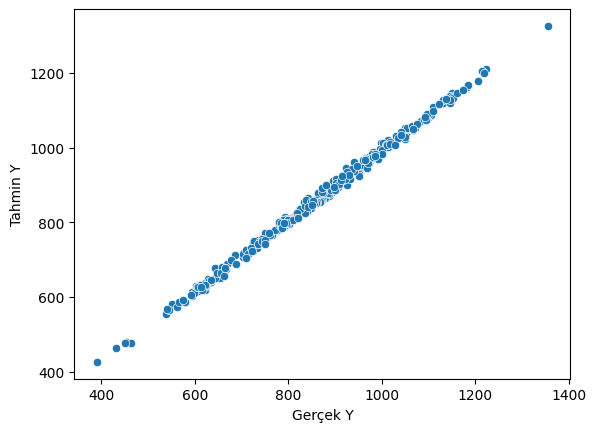

In [109]:
sbn.scatterplot(x = "Gerçek Y", y = "Tahmin Y", data = tahminDf)

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [111]:
mean_absolute_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

9.844905896400329

In [112]:
mean_squared_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

148.1861293760687

In [113]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [114]:
yeniBisikletOzellikleri = [[1751,1750]]

In [115]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [116]:
model.predict(yeniBisikletOzellikleri)

1/1 [==============================] - 0s 40ms/step


array([[913.1689]], dtype=float32)

In [117]:
from tensorflow.keras.models import load_model

In [118]:
model.save("bisiklet_modeli.h5")

In [119]:
sonradanCagirilanModel= load_model("bisiklet_modeli.h5")

In [120]:
sonradanCagirilanModel.predict(yeniBisikletOzellikleri)

1/1 [==============================] - 0s 75ms/step


array([[913.1689]], dtype=float32)